KNN Model Accuracy: 98.33%


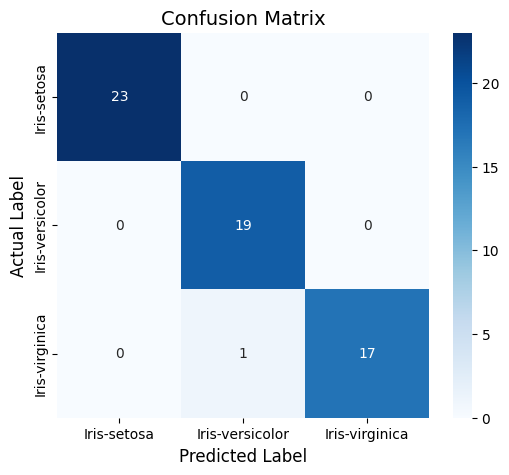

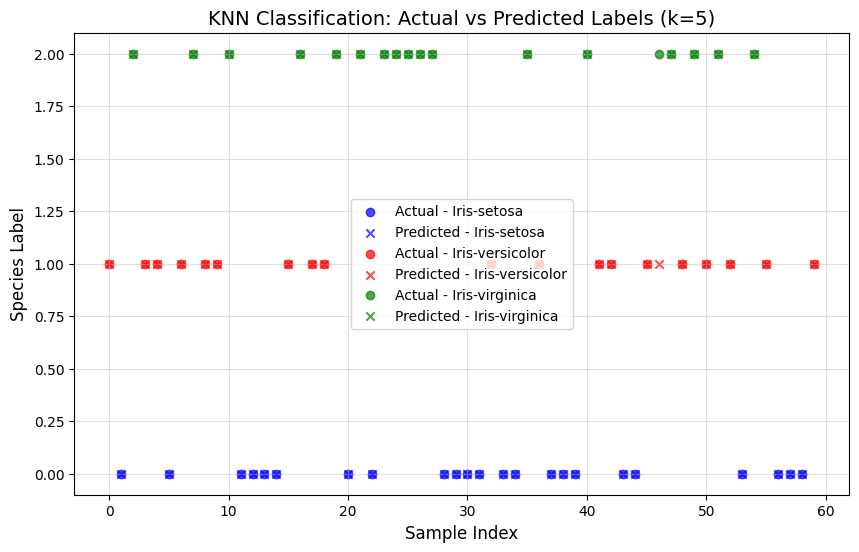

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset
file_path = "Iris.csv"  
df = pd.read_csv(file_path)

# Encode categorical target variable
label_encoder = LabelEncoder()
df["Species"] = label_encoder.fit_transform(df["Species"])  # Convert species names to numbers

# Split data into features and target
X = df.iloc[:, 1:-1].values  # Exclude 'Id' and target column
y = df["Species"].values  # Encoded target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Dynamic K-value selection
k = 5 
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Model Accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"KNN Model Accuracy: {accuracy:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("Actual Label", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

# Visualization: Actual vs Predicted Labels (Color-coded)
plt.figure(figsize=(10, 6))

# Define colors for different species
colors = ["blue", "red", "green"]
markers = ["o", "x", "s"]  # Circle (actual), X (predicted)

for i, species in enumerate(np.unique(y_test)):
    indices = np.where(y_test == species)[0]
    plt.scatter(indices, y_test[indices], color=colors[i], label=f"Actual - {label_encoder.classes_[i]}", marker=markers[0], alpha=0.7)

    indices = np.where(y_pred == species)[0]
    plt.scatter(indices, y_pred[indices], color=colors[i], label=f"Predicted - {label_encoder.classes_[i]}", marker=markers[1], alpha=0.7)

# Add title, labels, and legend
plt.title(f"KNN Classification: Actual vs Predicted Labels (k={k})", fontsize=14)
plt.xlabel("Sample Index", fontsize=12)
plt.ylabel("Species Label", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10, loc="best")
plt.grid(alpha=0.4)

# Show the plot
plt.show()


In [3]:
from sklearn.metrics import classification_report

# Print the classification report
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print("Classification Report:\n")
print(report)


Classification Report:

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        23
Iris-versicolor       0.95      1.00      0.97        19
 Iris-virginica       1.00      0.94      0.97        18

       accuracy                           0.98        60
      macro avg       0.98      0.98      0.98        60
   weighted avg       0.98      0.98      0.98        60

